In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

In [ ]:
df = pd.read_csv("movie_reviews.csv")

In [ ]:
X = df['review'].values
y = df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}).values

In [ ]:
class_counts = Counter(y)
class_weights = {i: len(y) / (3 * class_counts[i]) for i in class_counts}

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [ ]:
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=100),
    SimpleRNN(32, return_sequences=False),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_rnn = model_rnn.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7365 - loss: 0.8636 - val_accuracy: 1.0000 - val_loss: 0.3154
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 0.2274 - val_accuracy: 1.0000 - val_loss: 0.0944
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 0.0730 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - v

In [ ]:
y_pred_rnn = np.argmax(model_rnn.predict(X_test), axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


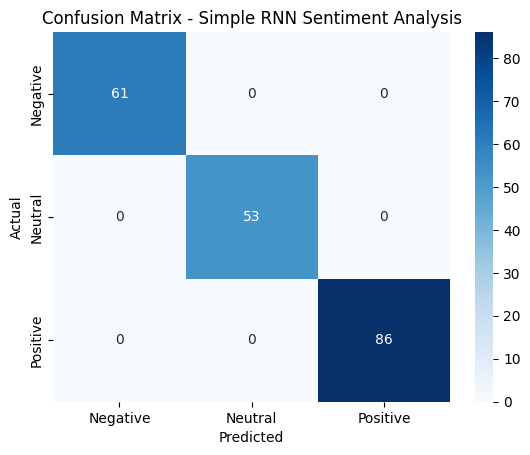

In [ ]:
cm = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix - Simple RNN Sentiment Analysis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report - Simple RNN:\n", classification_report(y_test, y_pred_rnn, target_names=['Negative', 'Neutral', 'Positive']))


Classification Report - Simple RNN:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        61
     Neutral       1.00      1.00      1.00        53
    Positive       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



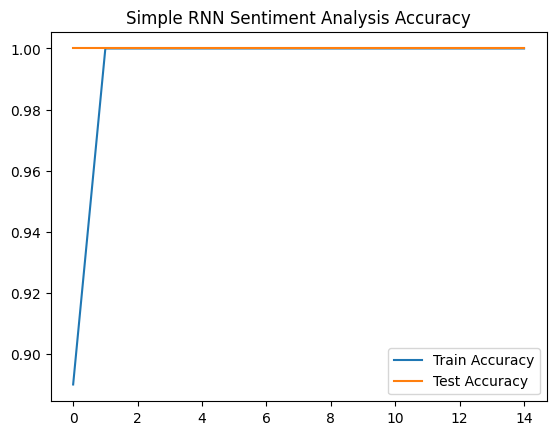

In [ ]:
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Simple RNN Sentiment Analysis Accuracy")
plt.show()


In [ ]:
sample_reviews = [
    "It was an okay movie, not too great, not too bad.",     # Neutral
    "Absolutely loved the acting and the direction!",       # Positive
    "The film was boring and had no depth in the plot.",    # Negative
    "A decent watch with some good moments but nothing special."  # Neutral
]
sample_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_pad = pad_sequences(sample_seq, maxlen=100)

In [ ]:
sample_preds_rnn = np.argmax(model_rnn.predict(sample_pad), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
for i, review in enumerate(sample_reviews):
    sentiment = sentiment_labels[sample_preds_rnn[i]]
    print(f"Review: {review}")
    print(f"RNN Sentiment Prediction: {sentiment}")
    print("-")

Review: It was an okay movie, not too great, not too bad.
RNN Sentiment Prediction: Neutral
-
Review: Absolutely loved the acting and the direction!
RNN Sentiment Prediction: Positive
-
Review: The film was boring and had no depth in the plot.
RNN Sentiment Prediction: Negative
-
Review: A decent watch with some good moments but nothing special.
RNN Sentiment Prediction: Neutral
-
